In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_excel("CHURNDATA.xlsx")
pd.set_option("display.max_columns", 30)
df.head(5)

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,4777.66,4348.95,14,8,5,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,223007.51,46379.40,8,7,6,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [3]:
df= df.rename(columns=str.lower)

# Data Cleaning

In [4]:
df.isnull().sum()

cif                                    0
cus_dob                                0
age                                    0
cus_month_income                      11
cus_gender                             2
cus_marital_status                     0
cus_customer_since                     0
years_with_us                          0
# total debit transactions for s1      0
# total debit transactions for s2      0
# total debit transactions for s3      0
total debit amount for s1              0
total debit amount for s2              0
total debit amount for s3              0
# total credit transactions for s1     0
# total credit transactions for s2     0
# total credit transactions for s3     0
total credit amount for s1             0
total credit amount for s2             0
total credit amount for s3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

Only the customer month income and customer gender has null value.So this null value can be either droped or replace with measure of central tendancy.

In [5]:
df['cus_month_income'].mean()

2764868.802915993

In [6]:
# asking python to read the given values as missing values/ null values.
#BEGIN CUSTOM CODE BELOW...
# asking python to read the given values as missing values/ null values.
missing_value = ["nan","#DIV/0!",'Missing Values','Missing',' ','-','NA','N/A','NaN','na','#ref', np.nan] 

#df_1 = pd.read_csv('churndata.csv', na_values = missing_value)
df_1 = df.replace(["nan","#DIV/0!",'Missing Values','Missing',' ','-','NA','N/A','NaN','na','#ref'],[np.nan]*11)

#Finding which columns has missing values
print('Columns and corresponding null values are:\n', df_1.isnull().sum().sort_values(ascending = False))

# Filling the NULL values in 'CUS_Month_Income' with mean 
df_1['cus_month_income'].fillna(2764868.802915993,inplace = True)

# Finding mode values to fill na values in,'customer gender' columns
customer_gender = df_1['cus_gender'].mode()
#Filling null values for 'customer gender'
df_1['cus_gender'].fillna(customer_gender.values[0],inplace = True)

#Checking if any null values exist
print('After DATA CLEANING:\n The Sum of Null Values In The Data Set is:', df_1.isnull().sum().sum())


Columns and corresponding null values are:
 cus_month_income                      11
cus_gender                             2
cif                                    0
# total credit transactions for s2     0
tar_desc                               0
cus_target                             0
total transactions                     0
total credit transactions              0
total credit amount                    0
total debit transactions               0
total debit amount                     0
total credit amount for s3             0
total credit amount for s2             0
total credit amount for s1             0
# total credit transactions for s3     0
# total credit transactions for s1     0
cus_dob                                0
total debit amount for s3              0
total debit amount for s2              0
total debit amount for s1              0
# total debit transactions for s3      0
# total debit transactions for s2      0
# total debit transactions for s1      0
years_with_us

In [7]:
df= df.rename(columns=str.lower)

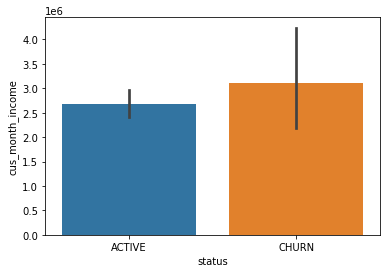

In [8]:
ax = sns.barplot(x = "status", y = "cus_month_income", data = df_1)

### obs:Average customer month income is quite high for churn customer as compared to active customer.

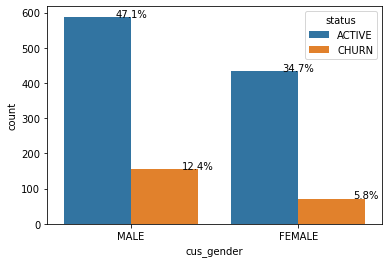

In [9]:
graph_data = df.groupby('status').count()
ax = sns.countplot(x = "cus_gender",  hue = 'status', data = df_1)

total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### obs:The average male customer is quite acitve as compared to female customer also the male churn customer is quite high compared to female churn customer. 

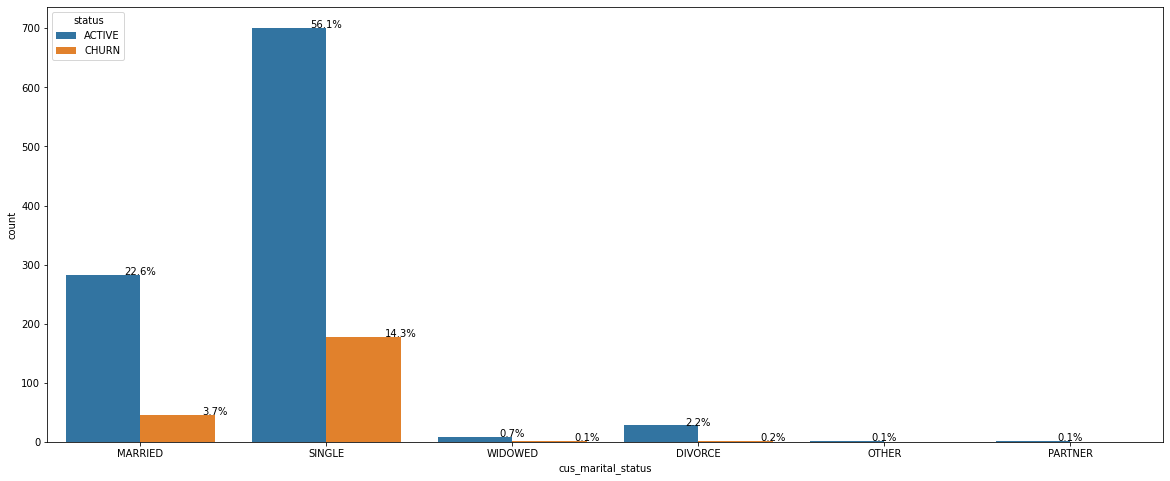

In [10]:
graph_data = df.groupby('status').count()
plt.figure(figsize=(20,8))
ax = sns.countplot(x = "cus_marital_status",  hue = 'status', data = df_1)


total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### obs: Mostly the active customer are single one and the second most active customers are married one similalry the churn customer are mostly contributed by single and married as compared to other customer marital status.

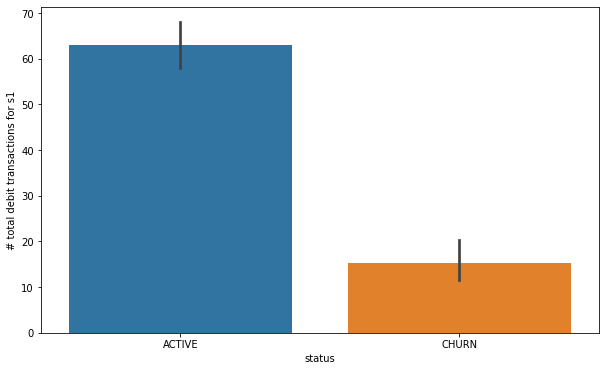

In [11]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y = "# total debit transactions for s1",  x = 'status', data = df)

### obs - If the average transaction per season are lesser than 20, then the customer tends to be a churn customer.

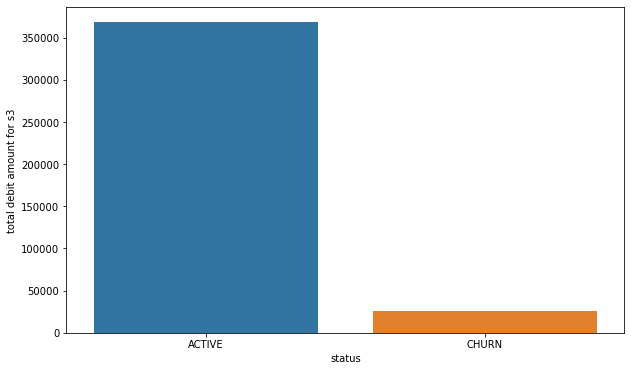

In [12]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y = "total debit amount for s3",  x = 'status', data = df_1, ci = None)

### obs:The debit amount for churn customer is about 3 times lesser than of the active customers. The debit amount for churn customers lies between 20,000 to 1,00,000.

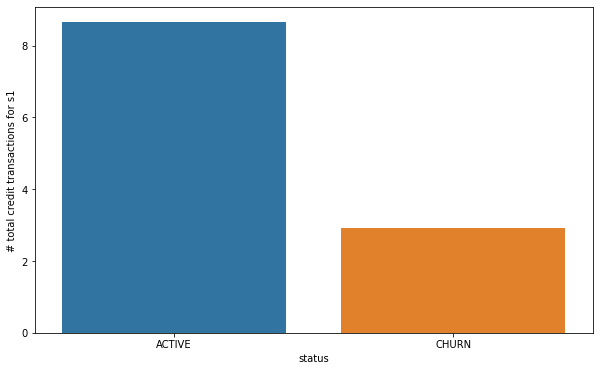

In [13]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y = "# total credit transactions for s1",  x = 'status', data = df_1, ci = None)

### obs:Total number of credit transactions done by churn customers is around 2 to 3 as opposed to 8 or >8 by active customers 

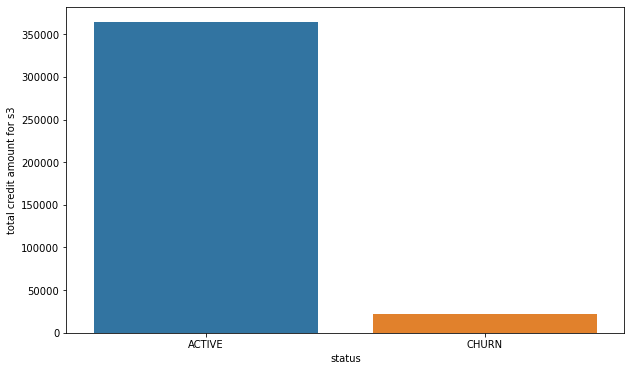

In [14]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y = "total credit amount for s3",  x = 'status', data = df_1, ci = None)

### obs:Total credit amount for churn customer lies in the range 20,000 to 60,000 as opposed to active customers with avg credit amount of 3.5 lakh or greater than 3.5 lakh. 

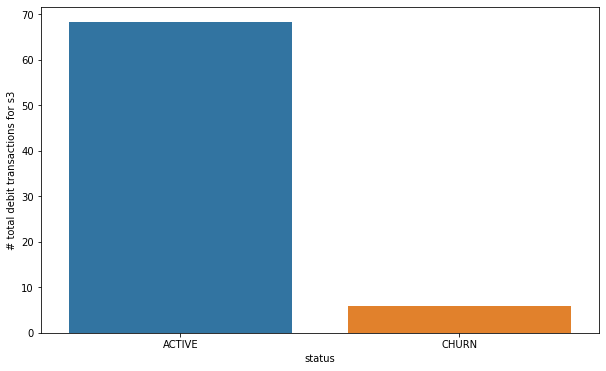

In [15]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y = "# total debit transactions for s3",  x = 'status', data = df_1, ci = None)

### obs:Total debit transactions is about 4 to 5 times lesser in churn customer.

### Creating a new column, percentage reduction in debit amount from s1 to s3

In [16]:
df['perc_reduc_debit_amount'] = 0
for i in range(0,len(df_1)):
    if df_1['total debit amount for s1'][i] == 0 or df_1['total debit amount for s3'][i] == 0:
        df_1['perc_reduc_debit_amount'][i] = 0
        
    elif df_1['total debit amount for s1'][i] == 0 and df_1['total debit amount for s3'][i] == 0:
        df_1['perc_reduc_debit_amount'][i] = 0
    else:
        df_1['perc_reduc_debit_amount'] = 100*((df_1['total debit amount for s1'] - df_1['total debit amount for s3'])/df_1['total debit amount for s1']) 

df_1['perc_reduc_debit_amount'].fillna(value = 0, inplace = True)

<ipython-input-16-89ff7eade20a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['perc_reduc_debit_amount'][i] = 0


In [17]:
df_1[df_1['status'] == 'CHURN'].describe()

,age,cus_month_income,years_with_us,# total debit transactions for s1,# total debit transactions for s2,# total debit transactions for s3,total debit amount for s1,total debit amount for s2,total debit amount for s3,# total credit transactions for s1,# total credit transactions for s2,# total credit transactions for s3,total credit amount for s1,total credit amount for s2,total credit amount for s3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,cus_target,perc_reduc_debit_amount
count,227.000000,2.270000e+02,227.000000,227.000000,227.000000,227.000000,2.270000e+02,2.270000e+02,227.000000,227.00000,227.000000,227.000000,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,227.000000,2.270000e+02,227.000000,227.000000,227.000000,227.000000
mean,46.414097,3.117658e+06,14.052863,15.259912,12.458150,5.973568,8.747938e+04,5.988930e+04,26034.045330,2.91630,2.766520,1.740088,5.680658e+04,4.735162e+04,2.225776e+04,1.734027e+05,33.691630,1.264160e+05,7.422907,41.114537,2222.674009,-inf
std,14.971518,7.641486e+06,2.326612,32.786630,36.271857,12.100947,5.906339e+05,3.313161e+05,89841.579995,8.84513,11.054296,4.471970,2.992087e+05,3.630800e+05,1.095943e+05,8.021535e+05,74.924458,6.143592e+05,23.468243,92.557397,1.918559,NaN
min,14.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2211.000000,-inf
25%,37.500000,1.114350e+04,14.000000,1.000000,0.000000,0.000000,6.053900e+02,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+03,3.000000,0.000000e+00,0.000000,4.000000,2222.000000,0.000000
50%,44.000000,1.341000e+06,14.000000,6.000000,2.000000,0.000000,6.350000e+03,2.000000e+03,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.010772e+04,14.000000,5.000000e+03,1.000000,17.000000,2223.000000,74.449584
75%,56.000000,3.000000e+06,14.000000,16.000000,12.000000,6.000000,3.344500e+04,3.043700e+04,8834.350000,4.00000,2.000000,1.000000,2.501921e+04,1.200000e+04,8.151500e+02,9.123375e+04,35.500000,5.668050e+04,6.000000,47.000000,2223.000000,100.000000
max,119.000000,8.000000e+07,28.000000,366.000000,450.000000,77.000000,8.629665e+06,4.763855e+06,845373.880000,104.00000,126.000000,39.000000,3.850000e+06,5.387378e+06,1.114000e+06,9.366032e+06,893.000000,7.890360e+06,269.000000,1090.000000,2233.000000,100.000000


In [18]:
df_1[df_1['status'] == 'ACTIVE'].describe()

,age,cus_month_income,years_with_us,# total debit transactions for s1,# total debit transactions for s2,# total debit transactions for s3,total debit amount for s1,total debit amount for s2,total debit amount for s3,# total credit transactions for s1,# total credit transactions for s2,# total credit transactions for s3,total credit amount for s1,total credit amount for s2,total credit amount for s3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,cus_target,perc_reduc_debit_amount
count,1022.000000,1.022000e+03,1022.000000,1022.000000,1022.000000,1022.000000,1.022000e+03,1.022000e+03,1.022000e+03,1022.000000,1022.000000,1022.000000,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1022.000000,1.022000e+03,1022.000000,1022.000000,1022.000000,1022.000000
mean,46.820939,2.686510e+06,14.131115,62.925636,65.280822,68.292564,3.652224e+05,3.643819e+05,3.683623e+05,8.656556,9.493151,10.216243,3.649593e+05,3.773593e+05,3.641409e+05,1.097967e+06,196.499022,1.106460e+06,28.365949,224.864971,2222.212329,-inf
std,11.650570,4.739039e+06,2.270285,85.530804,84.999259,89.552897,1.645744e+06,1.416094e+06,1.026489e+06,14.173420,13.866986,15.002880,1.793369e+06,1.137820e+06,1.399649e+06,3.431697e+06,248.315345,4.042932e+06,40.087382,277.013306,3.545828,NaN
min,14.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2211.000000,-inf
25%,39.000000,7.193730e+03,14.000000,12.000000,13.000000,13.000000,2.600201e+04,3.044312e+04,3.430077e+04,1.000000,2.000000,2.000000,5.500000e+03,1.012500e+04,1.010000e+04,1.148532e+05,45.000000,5.339888e+04,6.000000,60.000000,2222.000000,-83.234909
50%,46.000000,1.500000e+06,14.000000,29.500000,32.000000,35.000000,7.257205e+04,8.713190e+04,9.073344e+04,7.000000,6.000000,7.000000,5.773672e+04,7.051245e+04,6.559199e+04,2.830170e+05,101.500000,2.250626e+05,20.000000,120.500000,2223.000000,-9.498254
75%,55.000000,3.000000e+06,14.000000,78.000000,81.000000,85.000000,2.414844e+05,2.642710e+05,2.872167e+05,9.000000,10.000000,11.000000,2.189419e+05,2.621262e+05,2.619251e+05,8.113119e+05,232.000000,8.072595e+05,32.000000,272.750000,2223.000000,30.523860
max,87.000000,5.000000e+07,28.000000,715.000000,547.000000,757.000000,3.573349e+07,3.723382e+07,1.866511e+07,189.000000,142.000000,169.000000,4.920688e+07,1.753799e+07,3.764708e+07,6.997262e+07,1859.000000,1.043919e+08,429.000000,2174.000000,2236.000000,100.000000


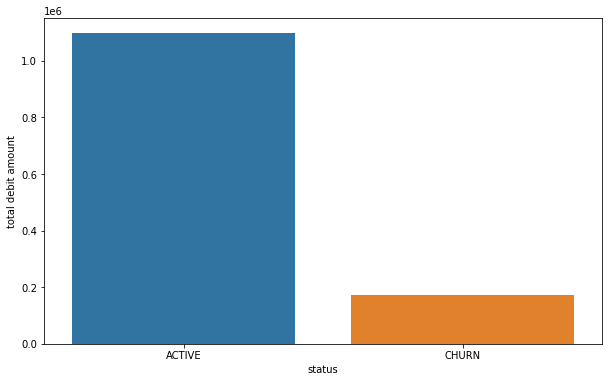

In [19]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y = "total debit amount",  x = 'status', data = df_1, ci = None)

### obs:The average Total Debit amount for churn customer is quite low which is around 1,65,000 as compared to active customer.

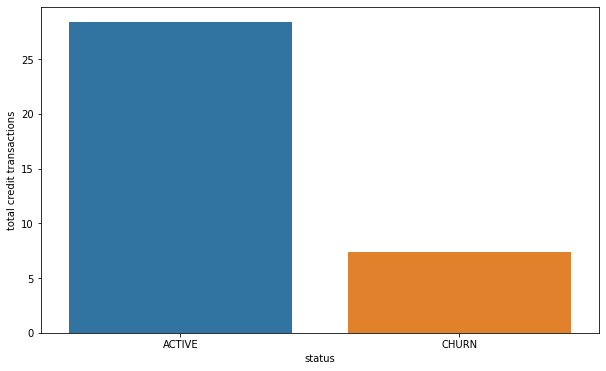

In [20]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y = "total credit transactions",  x = 'status', data = df_1, ci = None)

### obs:The average total credit transactions for churn customer is around 7.

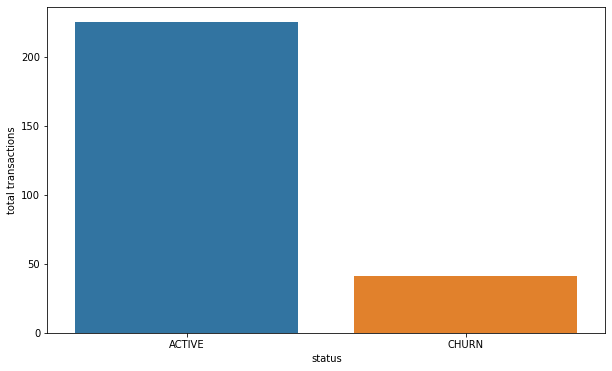

In [21]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y = "total transactions",  x = 'status', data = df_1, ci = None)

### obs:The average total transactions for churn customer in an year is around 40 as compared to active customer.

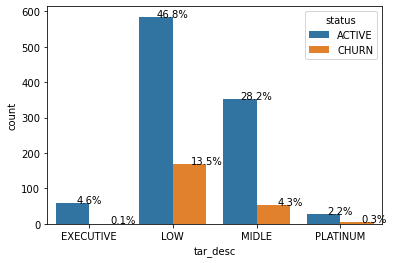

In [22]:
graph_data = df.groupby('status').count()
ax = sns.countplot(x = "tar_desc",  hue = 'status', data = df_1)

total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### obs:people who are tagged as LOW and MIDDLE under tar_desc are one of the major source of churn customers.

In [23]:
#import label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
lb_make=LabelEncoder()

In [24]:
df_1['tar_desc']=lb_make.fit_transform(df_1['tar_desc'])

In [25]:
df_1['cus_gender']=lb_make.fit_transform(df_1['cus_gender'])

In [26]:
df_1['cus_marital_status']=lb_make.fit_transform(df_1['cus_marital_status'])

In [27]:
df_1['cus_target']=lb_make.fit_transform(df_1['cus_target'])

In [28]:
df_1['status']=lb_make.fit_transform(df_1['status'])

In [29]:
df_1.columns

Index(['cif', 'cus_dob', 'age', 'cus_month_income', 'cus_gender',
       'cus_marital_status', 'cus_customer_since', 'years_with_us',
       '# total debit transactions for s1',
       '# total debit transactions for s2',
       '# total debit transactions for s3', 'total debit amount for s1',
       'total debit amount for s2', 'total debit amount for s3',
       '# total credit transactions for s1',
       '# total credit transactions for s2',
       '# total credit transactions for s3', 'total credit amount for s1',
       'total credit amount for s2', 'total credit amount for s3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'cus_target',
       'tar_desc', 'status', 'perc_reduc_debit_amount'],
      dtype='object')

In [30]:
## for statistical test
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [31]:
data=['age', 'cus_month_income', 'years_with_us',
       '# total debit transactions for s1',
       '# total debit transactions for s2',
       '# total debit transactions for s3', 'total debit amount for s1',
       'total debit amount for s2', 'total debit amount for s3',
       '# total credit transactions for s1',
       '# total credit transactions for s2',
       '# total credit transactions for s3', 'total credit amount for s1',
       'total credit amount for s2', 'total credit amount for s3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions']

In [32]:
for i in range(0,20):
    x, y = "status", data[i]
    cont_table = pd.crosstab(index=df_1[x], columns=df_1[y])
    chi2_test = scipy.stats.chi2_contingency(cont_table)
    chi2, p = chi2_test[0], chi2_test[1]
    n = cont_table.sum().sum()
    phi2 = chi2/n
    r,k = cont_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    coeff = np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
    coeff, p = round(coeff, 3), round(p, 3)
    conclusion = "Significant" if p < 0.05 else "Non-Significant"
    print("Cramer Correlation:", coeff, conclusion, "(p-value:"+str(p)+")")

Cramer Correlation: 0.18 Significant (p-value:0.001)
Cramer Correlation: 0.0 Non-Significant (p-value:0.657)
Cramer Correlation: 0.044 Non-Significant (p-value:0.326)
Cramer Correlation: 0.096 Non-Significant (p-value:0.285)
Cramer Correlation: 0.259 Significant (p-value:0.0)
Cramer Correlation: 0.428 Significant (p-value:0.0)
Cramer Correlation: 0.0 Non-Significant (p-value:0.969)
Cramer Correlation: 0.0 Non-Significant (p-value:0.999)
Cramer Correlation: 0.0 Non-Significant (p-value:0.997)
Cramer Correlation: 0.281 Significant (p-value:0.0)
Cramer Correlation: 0.38 Significant (p-value:0.0)
Cramer Correlation: 0.435 Significant (p-value:0.0)
Cramer Correlation: 0.0 Non-Significant (p-value:1.0)
Cramer Correlation: 0.0 Non-Significant (p-value:1.0)
Cramer Correlation: 0.0 Non-Significant (p-value:1.0)
Cramer Correlation: 0.0 Non-Significant (p-value:0.538)
Cramer Correlation: 0.173 Non-Significant (p-value:0.102)
Cramer Correlation: 0.0 Non-Significant (p-value:1.0)
Cramer Correlation

In [33]:
df_corr  = df_1[['age', 'cus_gender',
       '# total debit transactions for s2',
       '# total debit transactions for s3',
       '# total credit transactions for s1',
       '# total credit transactions for s2',
       '# total credit transactions for s3',
       'total credit transactions', 'cus_target',
       'tar_desc', 'status']]

In [34]:
##Heatmap to visualise the correlation matrix
df_corr_matrix=['age', 'cus_gender',
       '# total debit transactions for s2',
       '# total debit transactions for s3',
       '# total credit transactions for s1',
       '# total credit transactions for s2',
       '# total credit transactions for s3',
       'total credit transactions', 'cus_target',
       'tar_desc', 'status']
corr_matrix =df_corr.loc[:,:].corr()

In [35]:
corr_matrix

,age,cus_gender,# total debit transactions for s2,# total debit transactions for s3,# total credit transactions for s1,# total credit transactions for s2,# total credit transactions for s3,total credit transactions,cus_target,tar_desc,status
age,1.000000,-0.000003,-0.069276,-0.054500,-0.051233,-0.077252,-0.069688,-0.070961,0.005667,-0.050268,-0.012745
cus_gender,-0.000003,1.000000,0.027475,0.013376,0.007026,0.019722,0.008562,0.012605,-0.009174,-0.025139,0.084427
# total debit transactions for s2,-0.069276,0.027475,1.000000,0.886383,0.604065,0.667330,0.580254,0.661888,-0.016368,0.141812,-0.251523
# total debit transactions for s3,-0.054500,0.013376,0.886383,1.000000,0.578322,0.624711,0.664238,0.668464,0.020060,0.150249,-0.284018
# total credit transactions for s1,-0.051233,0.007026,0.604065,0.578322,1.000000,0.854593,0.731521,0.923109,0.034385,0.102012,-0.163516
# total credit transactions for s2,-0.077252,0.019722,0.667330,0.624711,0.854593,1.000000,0.823725,0.957260,0.027803,0.099420,-0.190187
# total credit transactions for s3,-0.069688,0.008562,0.580254,0.664238,0.731521,0.823725,1.000000,0.915959,0.054004,0.080028,-0.232120
total credit transactions,-0.070961,0.012605,0.661888,0.668464,0.923109,0.957260,0.915959,1.000000,0.041746,0.100490,-0.210039
cus_target,0.005667,-0.009174,-0.016368,0.020060,0.034385,0.027803,0.054004,0.041746,1.000000,-0.213823,0.025442
tar_desc,-0.050268,-0.025139,0.141812,0.150249,0.102012,0.099420,0.080028,0.100490,-0.213823,1.000000,-0.045863


<AxesSubplot:>

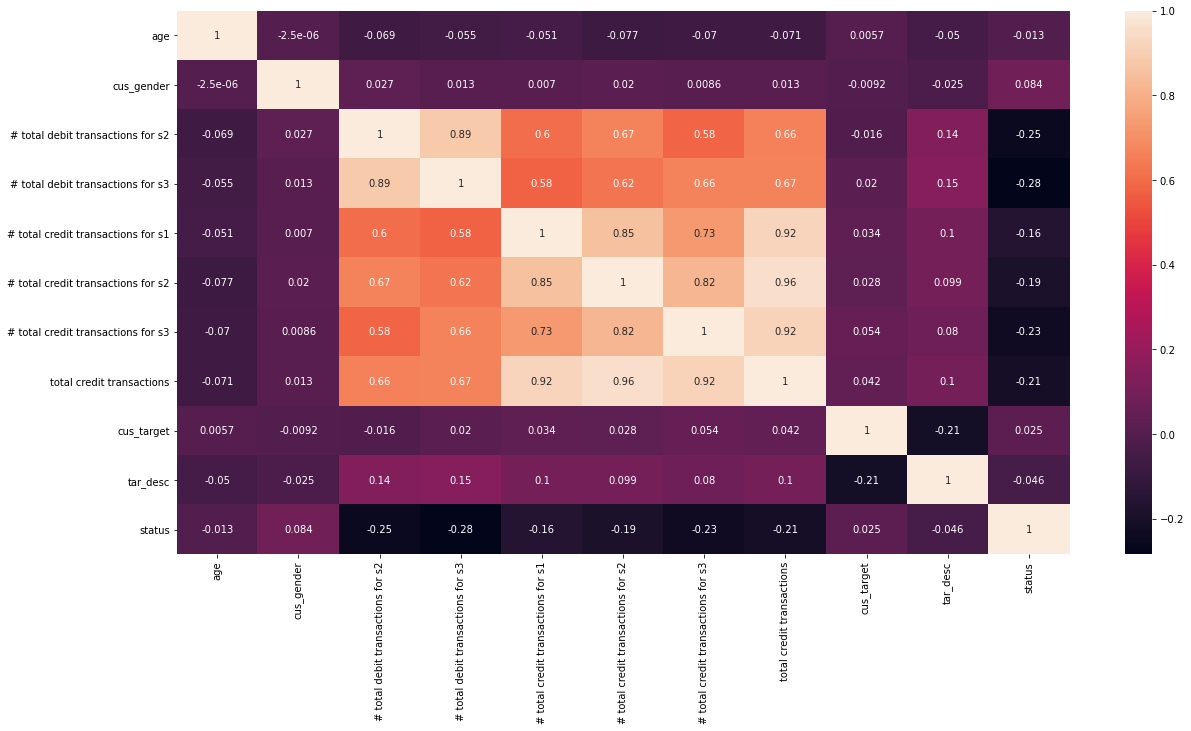

In [36]:
#Using heatmap to visualize the correlation matrix
ax = plt.subplots(figsize =(20, 10))
sns.heatmap(corr_matrix,annot=True)

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


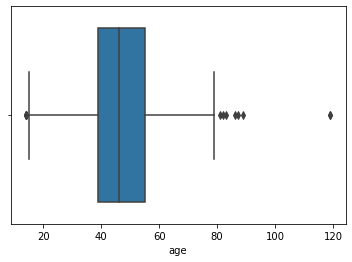

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


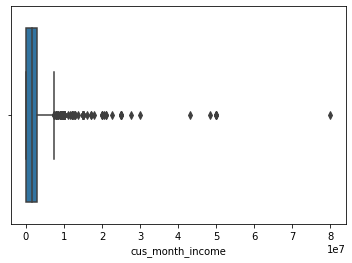

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


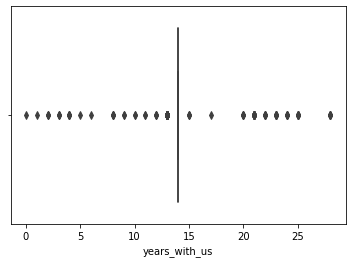

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


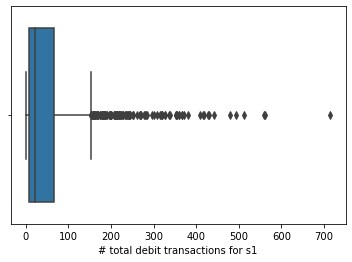

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


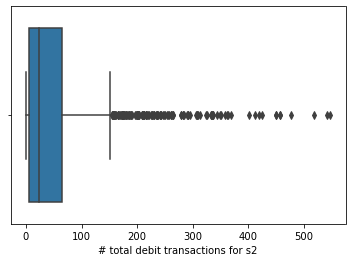

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


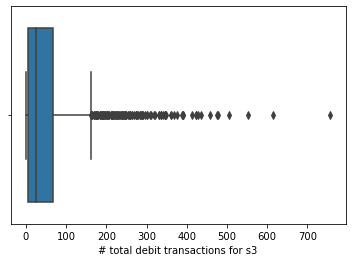

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


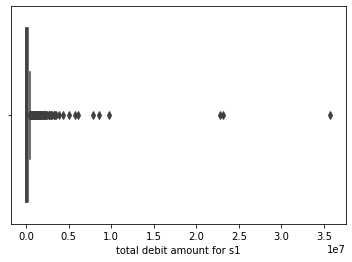

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


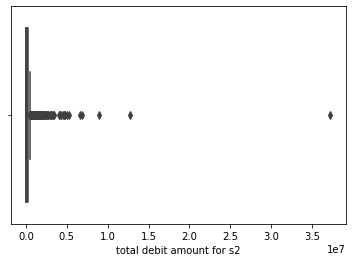

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


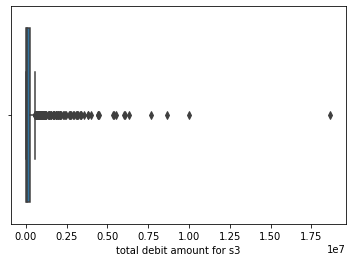

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


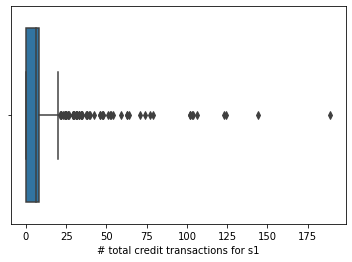

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


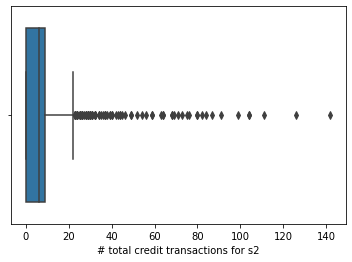

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


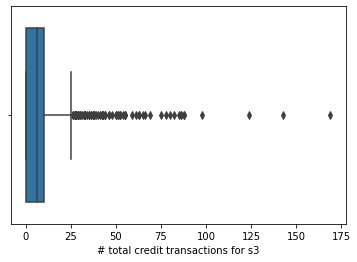

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


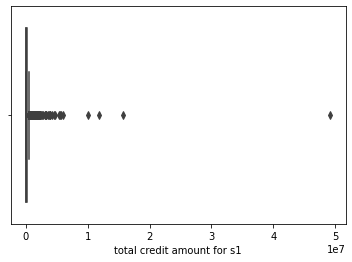

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


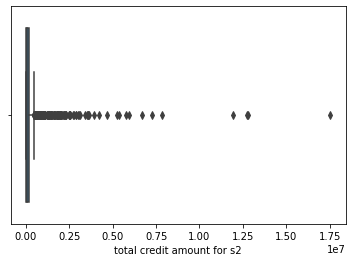

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


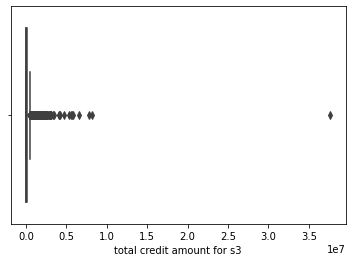

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


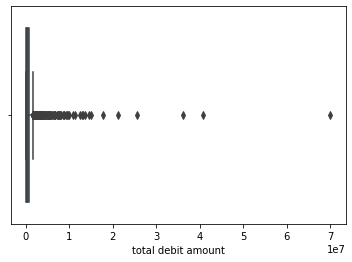

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


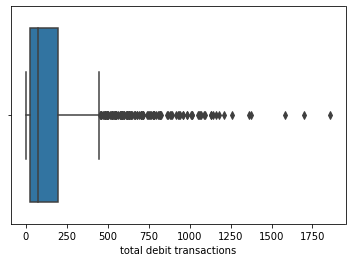

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


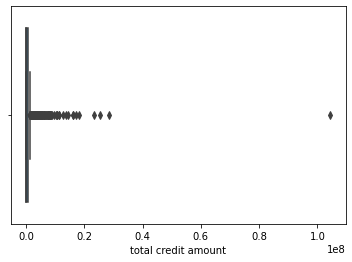

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


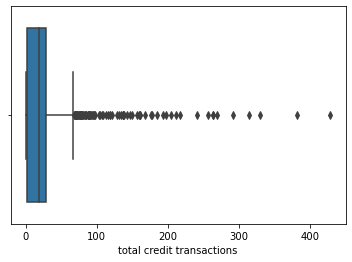

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


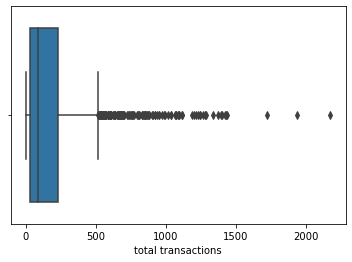

In [37]:
###checking the outlier for whole data
for i in range(0,20):
    sns.boxplot(df_1[data[i]])
    plt.show()

In [38]:
for i in range(0,20):

    df_1[data[i]]
    z = np.abs(stats.zscore(df_1[data[i]]))
    print(z)
    threshold = 3
    # Position of the outlier
    print(np.where(z > 3))
    # IQR
    Q1 = np.percentile(df_1[data[i]], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(df_1[data[i]], 75,
                       interpolation = 'midpoint')
    IQR = Q3 - Q1

[0.18301949 0.0606813  0.50795387 ... 1.03548446 1.80769141 0.91412185]
(array([ 39, 184, 309, 980, 996], dtype=int64),)
[0.51252423 0.23507403 0.41539589 ... 0.513661   0.14214976 0.41539589]
(array([  26,   93,  196,  239,  272,  423,  425,  439,  495,  555,  588,
        676,  683,  765,  830,  863, 1010, 1072, 1104, 1121, 1210],
      dtype=int64),)
[4.77545078 0.05129227 0.05129227 ... 0.05129227 0.05129227 0.05129227]
(array([   0,    4,   25,   28,   47,   60,   67,   85,   99,  135,  176,
        182,  184,  189,  208,  226,  308,  317,  329,  345,  370,  394,
        400,  402,  414,  427,  475,  496,  501,  521,  544,  547,  574,
        624,  637,  651,  652,  657,  689,  718,  743,  790,  846,  850,
        857,  886,  938,  985,  987,  996, 1038, 1041, 1047, 1051, 1070,
       1112, 1127, 1141, 1149, 1160, 1188], dtype=int64),)
[2.76006681 0.21391091 0.28826035 ... 4.470104   1.14916221 0.26936047]
(array([  44,   67,   83,  134,  177,  272,  306,  338,  439,  441,  444,
 

In [39]:
''' Detection '''
# IQR
Q1 = np.percentile(df_1[data[i]], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_1[data[i]], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_1.shape)
 
# Upper bound
upper = np.where(df_1[data[i]] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_1[data[i]] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_1.drop(upper[0], inplace = True)
df_1.drop(lower[0], inplace = True)
 
print("New Shape: ", df_1.shape)

Old Shape:  (1249, 29)
New Shape:  (1121, 29)


# Random Forest model for machine learning

In [40]:
df_1.columns

Index(['cif', 'cus_dob', 'age', 'cus_month_income', 'cus_gender',
       'cus_marital_status', 'cus_customer_since', 'years_with_us',
       '# total debit transactions for s1',
       '# total debit transactions for s2',
       '# total debit transactions for s3', 'total debit amount for s1',
       'total debit amount for s2', 'total debit amount for s3',
       '# total credit transactions for s1',
       '# total credit transactions for s2',
       '# total credit transactions for s3', 'total credit amount for s1',
       'total credit amount for s2', 'total credit amount for s3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'cus_target',
       'tar_desc', 'status', 'perc_reduc_debit_amount'],
      dtype='object')

In [41]:
##
var_columns=['age', 'cus_month_income', 'cus_gender',
       'cus_marital_status', 'years_with_us',
       '# total debit transactions for s1',
       '# total debit transactions for s2',
       '# total debit transactions for s3', 'total debit amount for s1',
       'total debit amount for s2', 'total debit amount for s3',
       '# total credit transactions for s1',
       '# total credit transactions for s2',
       '# total credit transactions for s3', 'total credit amount for s1',
       'total credit amount for s2', 'total credit amount for s3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'cus_target',
       'tar_desc']

In [42]:
var_columns

['age',
 'cus_month_income',
 'cus_gender',
 'cus_marital_status',
 'years_with_us',
 '# total debit transactions for s1',
 '# total debit transactions for s2',
 '# total debit transactions for s3',
 'total debit amount for s1',
 'total debit amount for s2',
 'total debit amount for s3',
 '# total credit transactions for s1',
 '# total credit transactions for s2',
 '# total credit transactions for s3',
 'total credit amount for s1',
 'total credit amount for s2',
 'total credit amount for s3',
 'total debit amount',
 'total debit transactions',
 'total credit amount',
 'total credit transactions',
 'total transactions',
 'cus_target',
 'tar_desc']

In [43]:
X = df_1.loc[:,var_columns]
y = df_1.loc[:,'status']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((896, 24), (225, 24), (896,), (225,))

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_train_pred = model_rf.predict_proba(X_train)[:,1]
y_test_pred = model_rf.predict_proba(X_test)[:,1]

data = {'y_Actual': y_test,'y_Predicted': y_test_pred}
df_cm = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(df_cm)

      y_Actual  y_Predicted
224          0         0.00
855          0         0.30
1238         0         0.13
159          0         0.09
625          0         0.00
...        ...          ...
524          0         0.32
468          0         0.00
1175         0         0.23
833          0         0.22
312          0         0.22

[225 rows x 2 columns]


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [49]:
rf_clf2 = RandomForestClassifier(n_estimators = 750, random_state = 100, min_samples_split= 4, min_samples_leaf= 1, max_features= 7, max_depth= 7)
rf_clf2.fit(X_train, y_train)
predictions = rf_clf2.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[167  16]
 [ 18  24]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       183
           1       0.60      0.57      0.59        42

    accuracy                           0.85       225
   macro avg       0.75      0.74      0.75       225
weighted avg       0.85      0.85      0.85       225



In [50]:
thres=[0.1,0.2,0.22,0.24,0.26,0.28,0.3,0.31,0.32,0.33,0.34,0.35,0.4,0.5,0.6,0.7,0.8,0.9] 
for i in thres:
    print("threshold=",i)

    #probability  scores of test data
    predictions2 = rf_clf2.predict_proba(X_test)[:,1]
    predictions2
    predictions3 = np.where(predictions2<i,0 ,1)

    #gb_clf2 = GradientBoostingClassifier(n_estimators=150, learning_rate=0.5, random_state= 42)
    #gb_clf2.fit(X_train, y_train)'''
    #predictions = gb_clf2.predict(X_valid)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions3))
    print("Classification Report")
    print(classification_report(y_test, predictions3))

threshold= 0.1
Confusion Matrix:
[[104  79]
 [  4  38]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.57      0.71       183
           1       0.32      0.90      0.48        42

    accuracy                           0.63       225
   macro avg       0.64      0.74      0.60       225
weighted avg       0.84      0.63      0.67       225

threshold= 0.2
Confusion Matrix:
[[139  44]
 [  8  34]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       183
           1       0.44      0.81      0.57        42

    accuracy                           0.77       225
   macro avg       0.69      0.78      0.70       225
weighted avg       0.85      0.77      0.79       225

threshold= 0.22
Confusion Matrix:
[[148  35]
 [  9  33]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       183
  

C:\Users\Tushar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tushar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tushar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
## call model
model_rf = ensemble.RandomForestClassifier()
## define hyperparameters combinations to try
param_dic = {    
'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
'max_depth':[2,3,4,5,6,7],    #maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20,40,60,100],    #sets the minimum number of samples to split
'min_samples_leaf':[1,3,5,7,9],     #the minimum number of samples to form a leaf
'max_features':[2,3,4,5,6,7],     #square root of features is usually a good starting point
}
## random search
random_search = model_selection.RandomizedSearchCV(model_rf, param_distributions=param_dic, n_iter=150, scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model_rf = random_search.best_estimator_

Best Model parameters: {'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 6, 'max_depth': 7}
Best Model mean accuracy: 0.8560086902545004


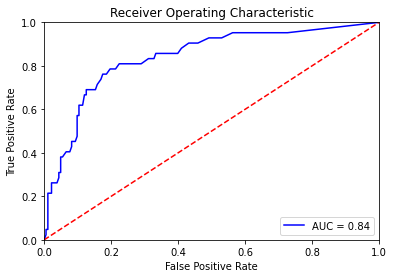

In [52]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

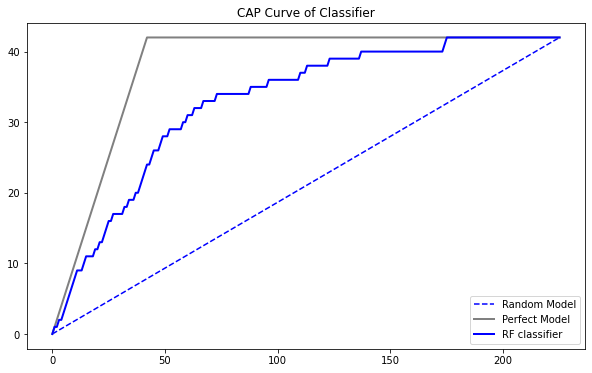

In [53]:
#Visualize the CAP Curve Analysis including all 4 classification models
total = len(y_test) 
one_count = np.sum(y_test) 
zero_count = total - one_count 
lm_gb = [y for _, y in sorted(zip(y_test_pred, y_test), reverse = True)]
x = np.arange(0, total + 1) 
y_gb = np.append([0], np.cumsum(lm_gb)) 
plt.figure(figsize = (10, 6)) 
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
plt.title('CAP Curve of Classifier')
plt.plot(x, y_gb, c = 'b', label = 'RF classifier', linewidth = 2)
plt.legend()

Average precision-recall score: 0.55


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.55')

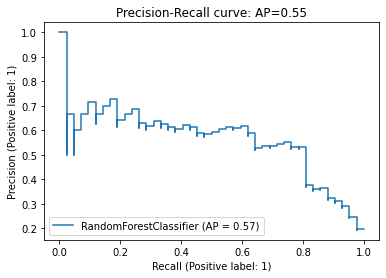

In [54]:
average_precision = average_precision_score(y_test, y_test_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
disp = plot_precision_recall_curve(model_rf, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))